Task1_0726. 신용카드 사기 검출 모델을 아래와 같이 생성하고 평가하세요.

- 데이터 일차 가공 및 모델 학습/예측/평가
  - Time 컬럼 삭제, 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

- Amount 컬럼 데이터 분포도 변환 후 모델 학습/예측/평가
  - 표준화한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

- 이상치 데이터 제거 후 모델 학습/예측/평가
  - 데이터의 상관관계를 시각화 V14와 클래스의 상관관계 높음을 확인 후 V14 컬럼의 이상치 제거한 후 로지스틱 회귀, LightGBM을 이용하여 모델링 및 평가

- SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
  - 불균형한 데이터셋 처리를 위한 imbalanced-learn 라이브러리를 설치
  - %pip install imbalanced-learn
  - SMOTE(Synthetic Minority Over-sampling Technique)를 사용하여 불균형한 데이터셋을 처리
  - from imblearn.over_sampling import SMOTE
  - smote = SMOTE(random_state=0)
  - X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
  - SMOTE를 적용한 학습 데이터셋을 사용하여 로지스틱 회귀 모델을 학습하고 예측 성능을 평가
  - Precision-Recall 커브를 시각화하는 함수
  - LightGBM을 이용하여 모델링 및 평가

In [1]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [2]:
data.drop('Time',inplace=True,axis=1)

In [5]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')


def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    cla_report = classification_report(y_test,y_pred)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_proba)

    print(f"Classification Report:\n {cla_report}")
    print(f'정확도 : {accuracy:.4f}')
    print(f"정밀도 :  {precision:.4f}")
    print(f"재현율 : {recall:.4f}")
    print(f"f1 스코어 : {f1:.4f}")
    print(f"Roc Auc : {roc_auc:.4f}")
    print()

X = data.drop('Class',axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 156, stratify=y)


lr = LogisticRegression()
evaluate(lr, X_train, X_test, y_train, y_test)

lgb_model = lgb.LGBMClassifier(random_state=42)
evaluate(lgb_model, X_train, X_test, y_train, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.52      0.65       148

    accuracy                           1.00     85443
   macro avg       0.94      0.76      0.83     85443
weighted avg       1.00      1.00      1.00     85443

정확도 : 0.9990
정밀도 :  0.8750
재현율 : 0.5203
f1 스코어 : 0.6525
Roc Auc : 0.9161

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
Classification Re

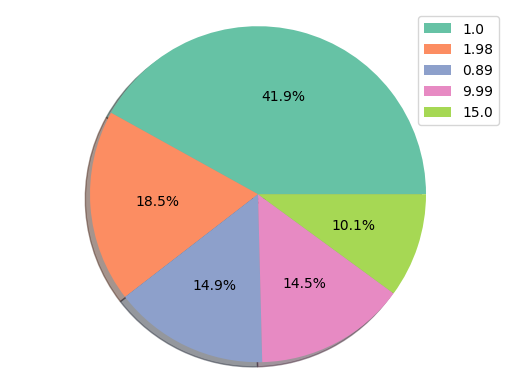

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
amount_top = data.Amount.value_counts().sort_values(ascending=False).head(5)
plt.pie(amount_top, autopct ="%1.1f%%",shadow=True,colors=sns.color_palette('Set2'))
plt.axis('equal')
plt.legend(labels=amount_top.index)
plt.show()

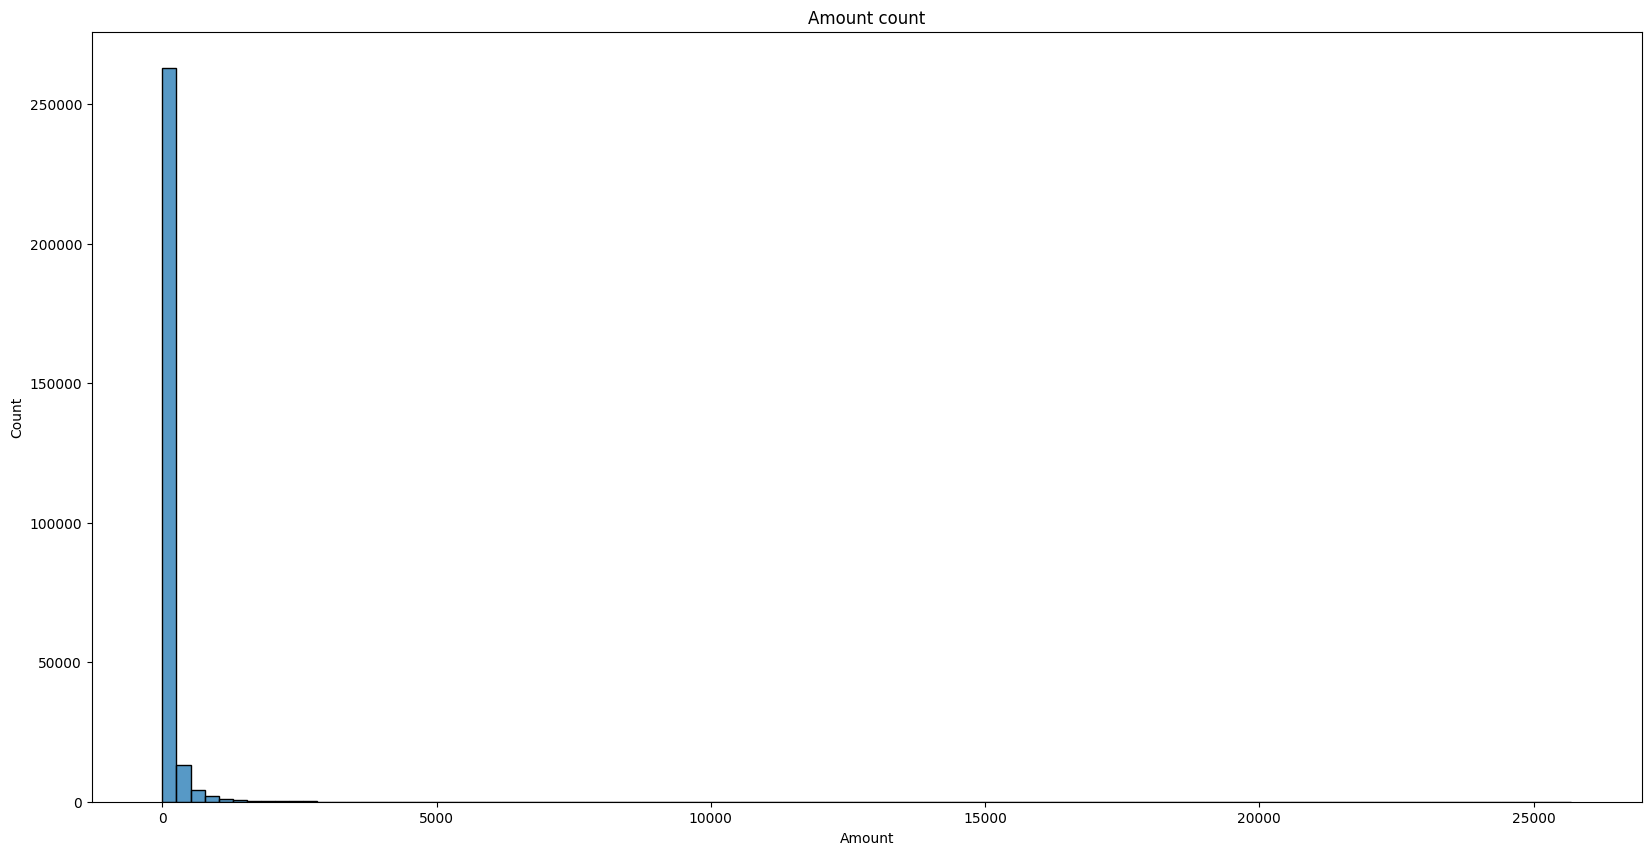

In [4]:
plt.figure(figsize=(20,10))
sns.histplot(data=data, x='Amount', bins=100)
plt.title('Amount count')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')


def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    cla_report = classification_report(y_test,y_pred)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_proba)

    print(f"Classification Report:\n {cla_report}")
    print(f'정확도 : {accuracy:.4f}')
    print(f"정밀도 :  {precision:.4f}")
    print(f"재현율 : {recall:.4f}")
    print(f"f1 스코어 : {f1:.4f}")
    print(f"Roc Auc : {roc_auc:.4f}")
    print()

X = data.drop('Class',axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 156, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


lr = LogisticRegression()
evaluate(lr, X_train, X_test, y_train, y_test)

lgb_model = lgb.LGBMClassifier(random_state=42)
evaluate(lgb_model, X_train, X_test, y_train, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.53      0.66       148

    accuracy                           1.00     85443
   macro avg       0.94      0.76      0.83     85443
weighted avg       1.00      1.00      1.00     85443

정확도 : 0.9991
정밀도 :  0.8864
재현율 : 0.5270
f1 스코어 : 0.6610
Roc Auc : 0.9454

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
Classification Report:
               precision    recall  f1-score   support

  

In [27]:
total = len(data.Class)
per_0 = len(data[data.Class == 0])
per_1 = len(data[data.Class == 1])
print(f"사기 X {per_0/total:.4f} 사기 {per_1 / total:.4f}")

사기 X 0.9983 사기 0.0017


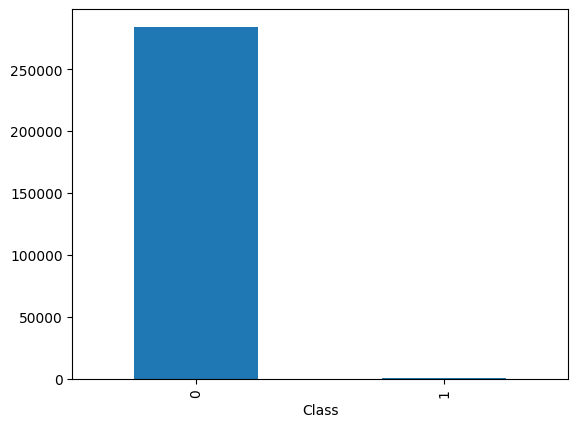

In [5]:
data.Class.value_counts().plot(kind='bar')
plt.show()

In [25]:


Q1 = data.V14.quantile(0.25)
Q3 = data.V14.quantile(0.75)

IQR = Q3 -Q1
outliers = data[(data.V14 < (Q1 - 1.5 * IQR)) | (data.V14 > (Q3 + 1.5 * IQR))]

data = data.drop(outliers.index)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')


def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    cla_report = classification_report(y_test,y_pred)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_proba)

    print(f"Classification Report:\n {cla_report}")
    print(f'정확도 : {accuracy:.4f}')
    print(f"정밀도 :  {precision:.4f}")
    print(f"재현율 : {recall:.4f}")
    print(f"f1 스코어 : {f1:.4f}")
    print(f"Roc Auc : {roc_auc:.4f}")
    print()

X = data.drop('Class',axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 156, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


lr = LogisticRegression()
evaluate(lr, X_train, X_test, y_train, y_test)

lgb_model = lgb.LGBMClassifier(random_state=42)
evaluate(lgb_model, X_train, X_test, y_train, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     81179
           1       0.50      0.11      0.17        19

    accuracy                           1.00     81198
   macro avg       0.75      0.55      0.59     81198
weighted avg       1.00      1.00      1.00     81198

정확도 : 0.9998
정밀도 :  0.5000
재현율 : 0.1053
f1 스코어 : 0.1739
Roc Auc : 0.7889

[LightGBM] [Info] Number of positive: 43, number of negative: 189417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 189460, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000227 -> initscore=-8.390506
[LightGBM] [Info] Start training from score -8.390506
Classification Report:
               precision    recall  f1-score   support

   

SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

불균형한 데이터셋 처리를 위한 imbalanced-learn 라이브러리를 설치
%pip install imbalanced-learn
SMOTE(Synthetic Minority Over-sampling Technique)를 사용하여 불균형한 데이터셋을 처리
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
SMOTE를 적용한 학습 데이터셋을 사용하여 로지스틱 회귀 모델을 학습하고 예측 성능을 평가
Precision-Recall 커브를 시각화하는 함수
LightGBM을 이용하여 모델링 및 평가

In [27]:
%pip install imbalanced-learn SMOTE

In [ ]:
Synthetic Minority Over-sampling Technique

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0) X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')


def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    cla_report = classification_report(y_test,y_pred)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_proba)

    print(f"Classification Report:\n {cla_report}")
    print(f'정확도 : {accuracy:.4f}')
    print(f"정밀도 :  {precision:.4f}")
    print(f"재현율 : {recall:.4f}")
    print(f"f1 스코어 : {f1:.4f}")
    print(f"Roc Auc : {roc_auc:.4f}")
    print()

X = data.drop('Class',axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 156, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


lr = LogisticRegression()
evaluate(lr, X_train, X_test, y_train, y_test)

lgb_model = lgb.LGBMClassifier(random_state=42)
evaluate(lgb_model, X_train, X_test, y_train, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     81179
           1       0.50      0.11      0.17        19

    accuracy                           1.00     81198
   macro avg       0.75      0.55      0.59     81198
weighted avg       1.00      1.00      1.00     81198

정확도 : 0.9998
정밀도 :  0.5000
재현율 : 0.1053
f1 스코어 : 0.1739
Roc Auc : 0.7889

[LightGBM] [Info] Number of positive: 43, number of negative: 189417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 189460, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000227 -> initscore=-8.390506
[LightGBM] [Info] Start training from score -8.390506
Classification Report:
               precision    recall  f1-score   support

   

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
def curve_plot(y_test, y_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    print(thresholds.shape)
    threshold_boundary = thresholds.shape[0]
    plt.figure(figsize=(10,6))
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label ='recall')
    start, end = plt.xlim() # 플롯의 x축의 현재 한계를 반환
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    # x축, y축 label과 legend 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size =0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train,y_train)
y_pred = random_forest_clf.predict(X_test)
y_proba = random_forest_clf.predict_proba(X_test)[:,1]
curve_plot(y_test, y_proba)
